## team_03
# 유방암 데이터 분류
---
- 두가지 속성을 선택하여 분류 작업을 수행한다

In [51]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

Populating the interactive namespace from numpy and matplotlib


In [52]:
print('data =>',cancer.data.shape)
print('target =>',cancer.target.shape)

malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

print('malignant(악성) =>',malignant.shape)
print('benign(양성) =>',benign.shape)

data => (569, 30)
target => (569,)
malignant(악성) => (212, 30)
benign(양성) => (357, 30)


- 평균 0, 표준편차 1 으로 정규화를 적용한다
- 정규화 후 학습용과 테스트용으로 데이터를 나누어 준다

In [53]:
X=cancer.data
y=cancer.target
X_train,X_test,y_train,y_test = train_test_split(X,y)

X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

X_train_scaled = (X_train-X_mean)/X_std
X_test_scaled = (X_test-X_mean)/X_std

print('X_train_scaled =',X_train_scaled.shape)
print('X_test_scaled =',X_test_scaled.shape)

X_train_scaled = (426, 30)
X_test_scaled = (143, 30)


- 속성 두개를 뽑아내자
- 예를 들어, 속성 0 과 속성 1에 대한 분석을 해보자

In [54]:
col1 = 0
col2 = 1

model = SVC(probability=True)
model.fit(X_train_scaled[:,[col1,col2]],y_train)

pred_y = model.predict(X_test_scaled[:,[col1,col2]])
score = model.score(X_test_scaled[:,[col1,col2]],y_test)

print(score)

0.8811188811188811


- 88% 라는 점수의 분류능력을 가늠하기 위해, 아래에서 속성0 1개만 가지고 다시 분석해 보자

In [55]:
col1 = 0
col2 = 0

model = SVC(probability=True)
model.fit(X_train_scaled[:,[col1,col2]],y_train)

pred_y = model.predict(X_test_scaled[:,[col1,col2]])
score = model.score(X_test_scaled[:,[col1,col2]],y_test)

print(score)

0.8811188811188811


- 속성 1개 보다도 좋지 못한 결과이므로, 속성0과 속성1을 선택하는 것은 좋지 못하다
- 아래에서 속성0과 속성1에 대한 구분선을 그려보자

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


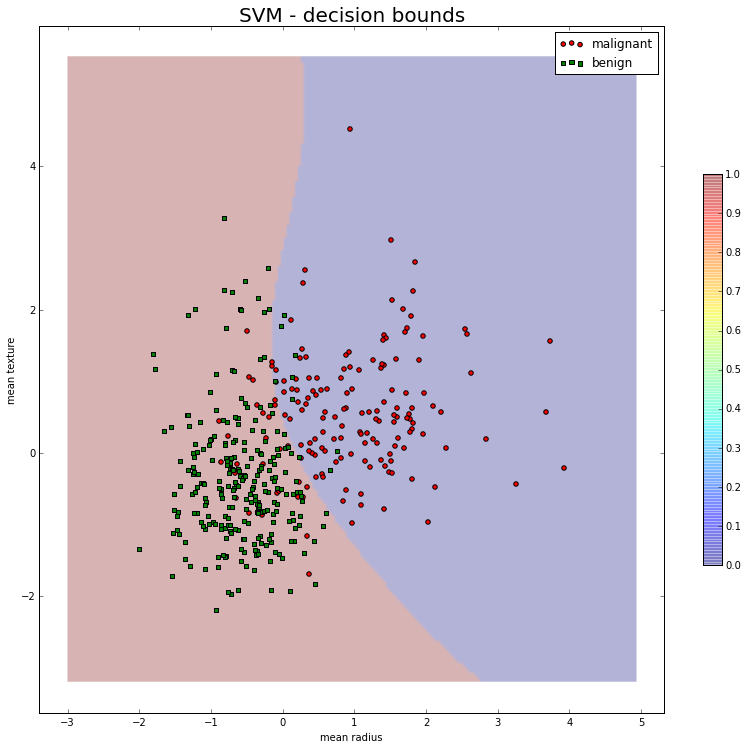

In [59]:
col1 = 0
col2 = 1

model = SVC(C=1, gamma=0.1)
model.fit(X_train_scaled[:,[col1,col2]],y_train)

# fit() 결과를 등고선으로 나타낸다
xmax = X_train_scaled[:,col1].max()+1
xmin = X_train_scaled[:,col1].min()-1
ymax = X_train_scaled[:,col2].max()+1
ymin = X_train_scaled[:,col2].min()-1

xx=np.linspace(xmin,xmax,200)
yy=np.linspace(ymin,ymax,200)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
pred_y = model.predict(X_grid)

fig=plt.figure(figsize=[14,14])

ax = plt.imshow(pred_y.reshape(200,200), interpolation=None, origin='lower',
           extent=[xmin,xmax,ymin,ymax], alpha=0.3)

# show Support Vectors
# sv=model.support_vectors_
# plt.scatter(sv[:,0],sv[:,1],marker='*', s=100, c='k', label='sv')

plt.scatter(X_train_scaled[:,col1][y_train==0],X_train_scaled[:,col2][y_train==0],marker='o',c='r',label='malignant')
plt.scatter(X_train_scaled[:,col1][y_train==1],X_train_scaled[:,col2][y_train==1],marker='s',c='g',label='benign')

plt.legend()
plt.colorbar(ax, shrink=0.5, alpha=0.3)
plt.xlabel(cancer.feature_names[col1])
plt.ylabel(cancer.feature_names[col2])
plt.title('SVM - decision bounds',fontsize=20)

C:\Anaconda3\lib\site-packages\numpy\ma\core.py:6447: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Anaconda3\lib\site-packages\numpy\ma\core.py:6447: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Anaconda3\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


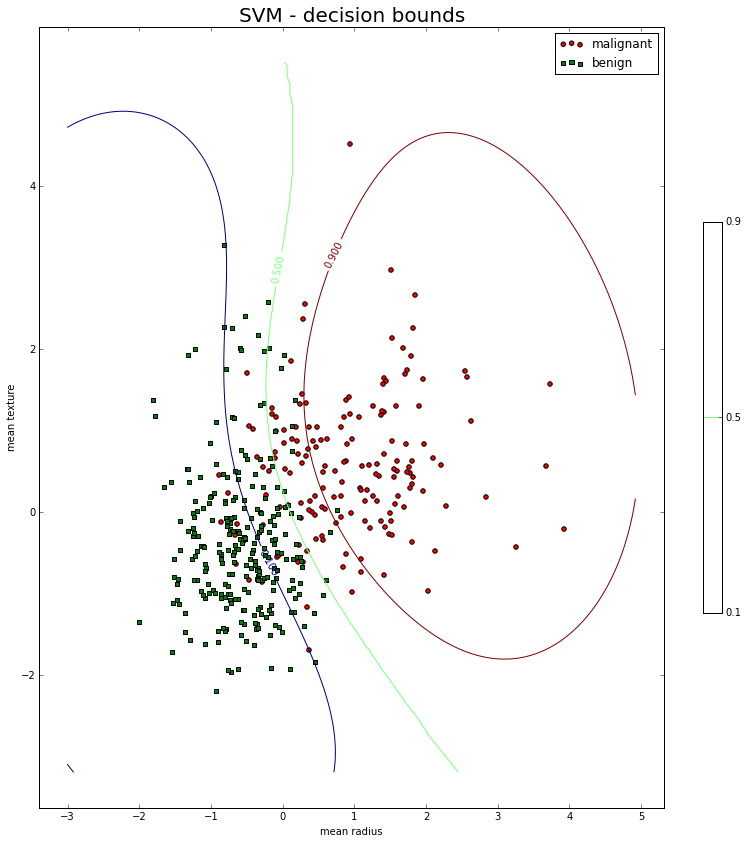

In [60]:
col1 = 0
col2 = 1

model = SVC(C=1, gamma=0.1, probability=True)
model.fit(X_train_scaled[:,[col1,col2]],y_train)

# fit() 결과를 등고선으로 나타낸다
xmax = X_train_scaled[:,col1].max()+1
xmin = X_train_scaled[:,col1].min()-1
ymax = X_train_scaled[:,col2].max()+1
ymin = X_train_scaled[:,col2].min()-1

xx=np.linspace(xmin,xmax,200)
yy=np.linspace(ymin,ymax,200)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
decision_values = model.predict_proba(X_grid)[:,0]

sv=model.support_vectors_

fig=plt.figure(figsize=[14,14])
CS=plt.contour(data1,data2,decision_values.reshape(data1.shape),levels=np.arange(0.1,1,0.4))
plt.clabel(CS, inline=2, fontsize=10)

plt.scatter(X_train_scaled[:,col1][y_train==0],X_train_scaled[:,col2][y_train==0],marker='o',c='r',label='malignant')
plt.scatter(X_train_scaled[:,col1][y_train==1],X_train_scaled[:,col2][y_train==1],marker='s',c='g',label='benign')

plt.legend()
plt.colorbar(CS,shrink=0.5)
plt.xlabel(cancer.feature_names[col1])
plt.ylabel(cancer.feature_names[col2])
plt.title('SVM - decision bounds',fontsize=20)